In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
def return_path(path_to_data, recording):
    return '\\'.join([path_to_data, recording]) + '.csv'


def fig_path(fig_type, fig_folder, recording):
    if not os.path.exists('\\'.join([fig_folder, fig_type])):
                          os.mkdir('\\'.join([fig_folder, fig_type]))
    return '\\'.join([fig_folder, fig_type, recording]) +'.png'

In [7]:
recordings_to_analyse = ['2018-04-18']

path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\neuron_characteristics'
fig_folder = r'C:\Users\Rory\raw_data\SERT_DREADD\figures'

Saving neuron distrobution figure:	2018-04-18
Saving neuron distrobution figure


C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


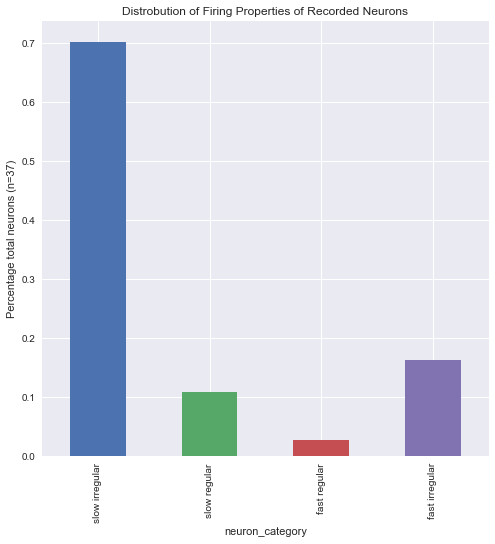

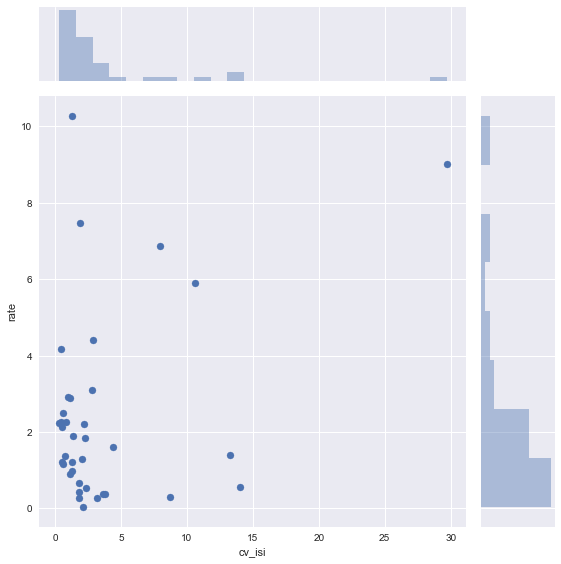

In [14]:
for recording in recordings_to_analyse:
    file = return_path(path_to_data, recording)
    df = pd.read_csv(file)
    
    total_neurons = df['cluster'].count()
    by_neuron_cat = df.groupby('neuron_category')['rate'].apply(lambda ser: ser.count()/total_neurons)
    by_neuron_cat = by_neuron_cat.reindex(['slow irregular', 'slow regular', 'fast regular', 'fast irregular'])
    
    
    f, a = plt.subplots(figsize=(8,8))
    by_neuron_cat.plot(kind='bar', ax=a,
              title='Distrobution of Firing Properties of Recorded Neurons')
    a.set_ylabel('Percentage total neurons (n={})'.format(total_neurons))
    print('Saving neuron distrobution figure:\t{}'.format(recording))
    plt.savefig(fig_path(fig_type='neuron_cat_distrobution',
                         fig_folder=fig_folder,
                         recording=recording),
                dpi=500)
    
    
    print('Saving neuron distrobution figure')
    sns.jointplot(data=df, x='cv_isi', y='rate',stat_func=None,
              size=8)
    plt.savefig(fig_path(fig_type='rate_reg_distscatter',
                         fig_folder=fig_folder,
                         recording=recording), dpi=500)
